In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
## Which type fat_content is preferred in each Outlet location Type.
## If the Age of outlet affects the sales
## Which features affects outlet sales most

In [35]:
df_train = pd.read_csv('./Train.csv')
df_test = pd.read_csv('./Test.csv')
df = pd.concat([df_train, df_test])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
#unique values in each columns
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [38]:
#there are 1559 items
# 10 Outlets opened in 9 different Years,between 1985 and 2009

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [40]:
#To divide the features into two type 
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[np.object])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       14204 non-null  object
 1   Item_Fat_Content      14204 non-null  object
 2   Item_Type             14204 non-null  object
 3   Outlet_Identifier     14204 non-null  object
 4   Outlet_Size           10188 non-null  object
 5   Outlet_Location_Type  14204 non-null  object
 6   Outlet_Type           14204 non-null  object
dtypes: object(7)
memory usage: 887.8+ KB


In [41]:
df_cat['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

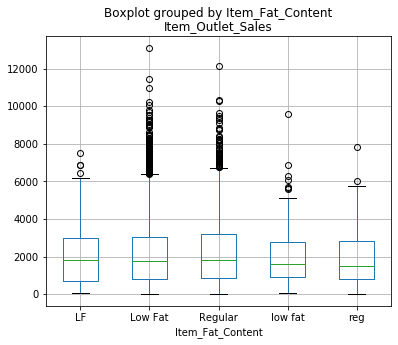

In [42]:
df.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content', figsize=(6,5))

In [43]:
#df_num['Y']

In [65]:
#it seems that there are only two type of fat content, i.e. Low Fat(Low Fat, low fat, LF) and Regular(Regular, reg)
df_cat['Item_Fat_Content'].replace(to_replace=['low fat','LF'], value='Low Fat', inplace=True)
df_cat['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)


In [45]:
df_num.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype('str') + '%'

Item_Outlet_Sales             40.0%
Item_Weight                  17.17%
Outlet_Establishment_Year      0.0%
Item_MRP                       0.0%
Item_Visibility                0.0%
dtype: object

In [67]:
#there are many missing data in the Item_weight and Item_Outlet_Sales columns
#therefore filling in with mean data
df_num.fillna(df_num.mean(), inplace = True)

In [47]:
df_num.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype('str') + '%'

Item_Outlet_Sales            0.0%
Outlet_Establishment_Year    0.0%
Item_MRP                     0.0%
Item_Visibility              0.0%
Item_Weight                  0.0%
dtype: object

In [48]:
df_cat.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype('str') + '%'

Outlet_Size             28.27%
Outlet_Type               0.0%
Outlet_Location_Type      0.0%
Outlet_Identifier         0.0%
Item_Type                 0.0%
Item_Fat_Content          0.0%
Item_Identifier           0.0%
dtype: object

In [69]:
#Using forward fill to impute NaN values in Outlet

df_cat.fillna(method='ffill',inplace=True)

In [50]:
df_cat.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype('str') + '%'

Outlet_Type             0.0%
Outlet_Location_Type    0.0%
Outlet_Size             0.0%
Outlet_Identifier       0.0%
Item_Type               0.0%
Item_Fat_Content        0.0%
Item_Identifier         0.0%
dtype: object

In [51]:
#now combining data
df_new = pd.concat([df_num, df_cat], axis=1)

In [52]:
df_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,2009,443.4228,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,1999,2097.2700,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,1998,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,1987,994.7052,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [53]:
## Exploring

In [54]:
# Which type fat_content is preferred in each Outlet location Type. 

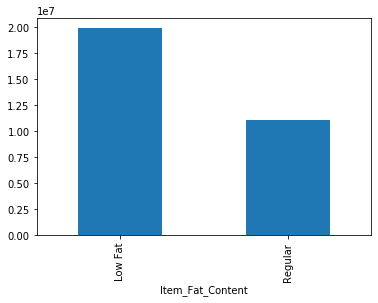

In [55]:
df_by_fat = df_new.groupby(['Item_Fat_Content']).sum()
df_by_fat['Item_Outlet_Sales'].plot(kind='bar')

df_sales = df_new.groupby(['Item_Fat_Content','Outlet_Location_Type']).sum()
df_sales.head()

In [56]:
df_sales_r = df_new.groupby(['Outlet_Location_Type','Item_Fat_Content']).sum()
df_sales_r.head()

Item_Weight  Item_Visibility  \
Outlet_Location_Type Item_Fat_Content                                  
Tier 1               Low Fat           33232.061910       176.252824   
                     Regular           17730.939811       102.985773   
Tier 2               Low Fat           38777.705000       178.941744   
                     Regular           20601.875000       103.965259   
Tier 3               Low Fat           46357.927062       235.113447   

                                          Item_MRP  Outlet_Establishment_Year  \
Outlet_Location_Type Item_Fat_Content                                           
Tier 1               Low Fat           362996.7232                    5141435   
                     Regular           197942.4072                    2799165   
Tier 2               Low Fat           423824.5938                    6017003   
                     Regular           230500.1224                    3285094   
Tier 3               Low Fat           510003.5446                    7191629   

                                       Item_Outlet_Sales  
Outlet_Location_Type Item_Fat_Content                     
Tier 1               Low Fat                5.090744e+06  
                     Regular                2.863927e+06  
Tier 2               Low Fat                6.737065e+06  
                     Regular                3.783721e+06  
Tier 3               Low Fat                8.077254e+06

df_sales['Item_Outlet_Sales']['Regular'].plot(kind='bar')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
df_sales['Item_Outlet_Sales']['Regular'].plot(kind='bar',color='Blue',ax=ax1,width=0.3,position=1)
df_sales['Item_Outlet_Sales']['Low Fat'].plot(kind='bar',color='green',ax=ax2,width=0.3,position=0)
plt.show()

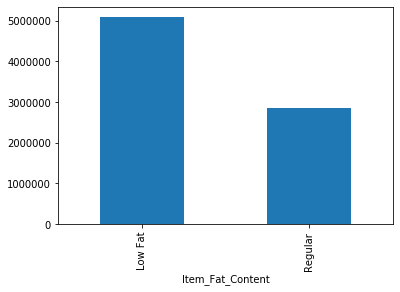

In [57]:
df_sales_r['Item_Outlet_Sales']['Tier 1'].plot(kind='bar')

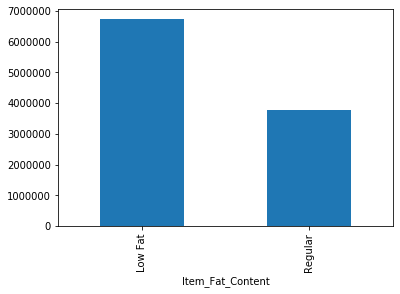

In [58]:
df_sales_r['Item_Outlet_Sales']['Tier 2'].plot(kind='bar')

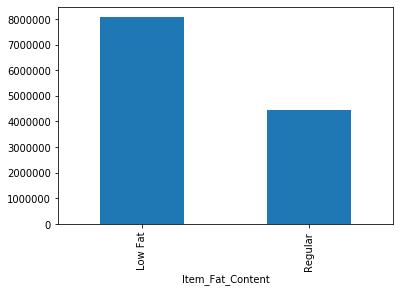

In [59]:
df_sales_r['Item_Outlet_Sales']['Tier 3'].plot(kind='bar')

In [60]:
df_year = df_new.groupby(['Outlet_Establishment_Year']).sum()

## If the Age of outlet affects the sales

In [61]:
df_year.index = (2020 - df_year.index.values)
df_year[['Item_Outlet_Sales']] = df_year[['Item_Outlet_Sales']].div(df_year.index.values,axis=0)

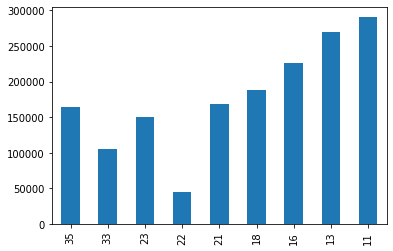

In [62]:
df_year['Item_Outlet_Sales'].plot(kind='bar')

In [71]:
df_grp = df_new
df_grp['Outlet_Establishment_Year'] = 2020 - df_grp['Outlet_Establishment_Year']

In [72]:
df_year_type = df_grp.groupby(['Outlet_Type', 'Outlet_Establishment_Year']).sum()

In [73]:
df_year_type

Item_Weight  Item_Visibility  \
Outlet_Type       Outlet_Establishment_Year                                  
Grocery Store     22                         11768.655000        94.293418   
                  35                         11257.711721        94.502641   
Supermarket Type1 13                         19722.750000        94.342210   
                  16                         19846.925000        94.280279   
                  18                         19809.905000        94.284513   
                  21                         19844.655000        91.450099   
                  23                         19860.635000        93.285857   
                  33                         19859.980000        93.555174   
Supermarket Type2 11                         19794.425000        92.723425   
Supermarket Type3 35                         19944.059742        94.075671   

                                                Item_MRP  Item_Outlet_Sales  
Outlet_Type       Outlet_Establishment_Year                                  
Grocery Store     22                         130572.7618       9.954171e+05  
                  35                         123862.1000       9.475078e+05  
Supermarket Type1 13                         217561.3500       3.513321e+06  
                  16                         218716.2030       3.620522e+06  
                  18                         218047.1632       3.386943e+06  
                  21                         218802.9588       3.536369e+06  
                  23                         218274.0716       3.470794e+06  
                  33                         219172.4492       3.497244e+06  
Supermarket Type2 11                         217987.3906       3.199859e+06  
Supermarket Type3 35                         219838.2488       4.815050e+06

In [85]:
df_year_type[['Item_Outlet_Sales']] = df_year_type[['Item_Outlet_Sales']].div(df_year_type.index.get_level_values('Outlet_Establishment_Year').values,axis=0)

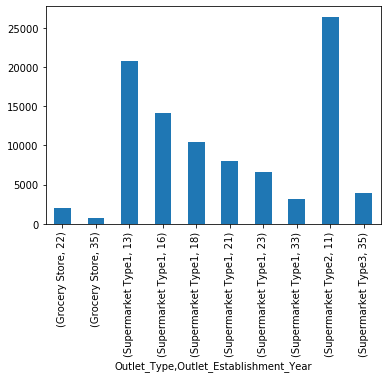

In [89]:
df_year_type['Item_Outlet_Sales'].plot(kind='bar')
plt.show()

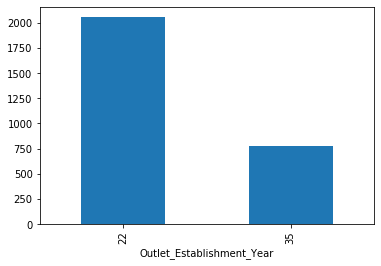

In [90]:
df_year_type['Item_Outlet_Sales']['Grocery Store'].plot(kind='bar')
plt.show()

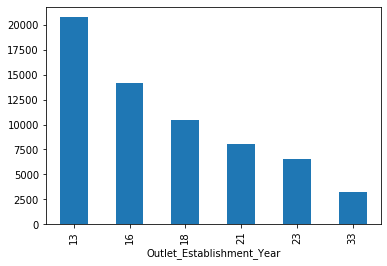

In [91]:
df_year_type['Item_Outlet_Sales']['Supermarket Type1'].plot(kind='bar')
plt.show()

In [ ]:
#### We cannot compare for other outlet types as there is only on outlet of each kind

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [ ]:
sns.distplot(df['Item_MRP'])
plt.show()